<div align="right">
  <img src="https://drive.google.com/uc?export=view&id=1J8JpP65HsHXdpJvhb_sMwn3yROyU832m" height="80" width="200" style="float: right;">
</div>
<h1><b>Data Science and Machine Learning</b></h1>
<h2><b>Clase 21</b>: Random forest</h2>
<h3><b>Docente</b>: <a href="https://www.linkedin.com/in/danielablanco/">Daniela Blanco</a>

# Contenido

- [1. Random forest](#random)
- [2. Algoritmo](#algoritmo)
- [3. Hiperparámetros](#hiperparametros)
- [4. Ejemplo práctico](#ejemplo)
- [5. Links de interés](#links)


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error, r2_score

from pickle import dump

## 1. Random forest <a name="random"></a>

<img src="https://drive.google.com/uc?export=view&id=1mq-RmbMCN7T3IfsdHoL6lmRwjG4qaoBO" height="170" width="297" style="float: center;">

Se utiliza para tareas de **clasificación** y **regresión**.

Es un tipo de aprendizaje en el que se **ensamblan modelos** (model ensembling) para combinar las predicciones de múltiples árboles de decisión para generar una salida más precisa y robusta.

Cada árbol en un random forest se construye de manera independiente utilizando un **subconjunto aleatorio de los datos** de entrenamiento.

Luego, para hacer la predicción, cada árbol en el bosque hace su propia predicción y la **predicción final** se toma por **votación** de mayoría en el caso de clasificación, o **promedio** en el caso de regresión.

Este enfoque ayuda a superar el problema del sobreajuste, que es común con los árboles de decisión individuales.

#### Ventajas

- Precisión Mejorada: La combinación de múltiples árboles reduce el riesgo de sobreajuste (overfitting) en comparación con un solo árbol de decisión.

- Robustez: Es robusto frente a outliers y datos ruidosos, ya que los árboles individuales pueden hacer predicciones erróneas, pero estas se compensan en el conjunto.

- Reducción de la Varianza: Al promediar múltiples árboles, se reduce la varianza de las predicciones, lo que resulta en un modelo más estable y generalizable.

### Desventajas

- Interpretabilidad: Aunque los árboles de decisión individuales son fáciles de interpretar, un bosque aleatorio, compuesto por muchos árboles, puede ser difícil de interpretar.

- Requisitos Computacionales: Entrenar y predecir con un bosque aleatorio puede ser computacionalmente costoso y requerir más memoria y tiempo en comparación con modelos más simples.

## 2. Algoritmo <a name="algoritmo"></a>

La estructura del random forest, con su combinación de aleatoriedad y agregación, ayuda a crear un modelo robusto que es menos propenso a sobreajustarse a los datos de entrenamiento en comparación con un solo árbol de decisión.

- Bootstrap Aggregating (Bagging):

  Se generan múltiples subconjuntos de datos a partir del conjunto de datos original utilizando el muestreo con reemplazo.

  Cada uno de estos subconjuntos se utiliza para entrenar un árbol de decisión independiente.

- Entrenamiento de Árboles de Decisión:

  Cada árbol de decisión se entrena con un subconjunto de los datos.

  Además de seleccionar subconjuntos aleatorios de datos, el random forest también selecciona un subconjunto aleatorio de las características de cada árbol para determinar la mejor división.

  Esto añade otra capa de aleatoriedad al modelo, lo que ayuda a aumentar la diversidad entre los árboles y mejorar la robustez del modelo en general.

- Combinación de Árboles:

  Para problemas de clasificación, la predicción final del bosque aleatorio se obtiene mediante el voto mayoritario de las predicciones de todos los árboles.

  Para problemas de regresión, la predicción final se calcula promediando las predicciones de todos los árboles.

<img src="https://drive.google.com/uc?export=view&id=1AwCNlD9BLAY1ws57PDlWcPGPhFp7EA2L" height="356" width="583" style="float: center;">

## 3. Hiperparámetros <a name="hiperparametros"></a>

Podemos construir un árbol de decisión utilizando la librería `scikit-learn` y las funciones `RandomForestClassifier` y `RandomForestRegressor`.

Algunos de sus hiperparámetros más importantes y los primeros en los que debemos centrarnos son:

**n_estimators**: define el número de árboles de decisión en el bosque.

En general, un número mayor de árboles aumenta la precisión y hace que las predicciones sean más estables, pero también puede ralentizar considerablemente el tiempo de cálculo.

**bootstrap**: para controlar si se utilizan muestras de bootstrap (muestreo con reemplazo) para la construcción de árboles.

**max_depth**: la profundidad máxima de los árboles. Esto es esencialmente cuántas divisiones puede hacer el árbol antes de hacer una predicción.

**min_samples_split**: El número mínimo de muestras necesarias para dividir un nodo en cada árbol. Si se establece un valor alto, evita que el modelo aprenda relaciones demasiado específicas y, por tanto, ayuda a prevenir el sobreajuste.

**min_samples_leaf**: El número mínimo de muestras que se deben tener en un nodo hoja en cada árbol.

**max_features**: El número máximo de características a considerar al buscar la mejor división dentro de cada árbol. Por ejemplo, si tenemos 10 características, podemos elegir que cada árbol considere solo un subconjunto de ellas al decidir dónde dividir.

## 4. Ejemplo práctico <a name="ejemplo"></a>

#### Random forests para clasificación

Para ejemplificar la implementación de un random forest para clasificación utilizaremos el mismo conjunto de datos que para el caso de los árboles de decisión.

## Paso 1. Lectura del conjunto de datos procesado

## Paso 2. Selección de variables

In [2]:
X, y = load_iris(return_X_y = True, as_frame = True)

In [3]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [4]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


Siendo la clase `0` una `iris setosa`, la `1` una `iris versicolor` y la `2` una `iris virginica`.

In [5]:
y.unique()

array([0, 1, 2])

Además, no es necesario que las variables predictoras estén normalizadas, ya que los random forests y, por lo tanto, los árboles de decisión no se ven afectados por la escala de los datos debido a la forma en la que funcionan: toman decisiones basadas en ciertos umbrales de características, independientemente de su escala.de datos que se utiliza para trazar variables numéricas multivariadas:

## Paso 3. Modelado

In [13]:
# modelo
# default n_estimators=100
model = RandomForestClassifier(random_state = 16, n_estimators = 5)

# entrenamiento
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=16)

Una vez que el modelo se ha entrenado correctamente, podemos visualizar el random forest con la misma librería. Esta visualización mostrará cada árbol derivado completo:

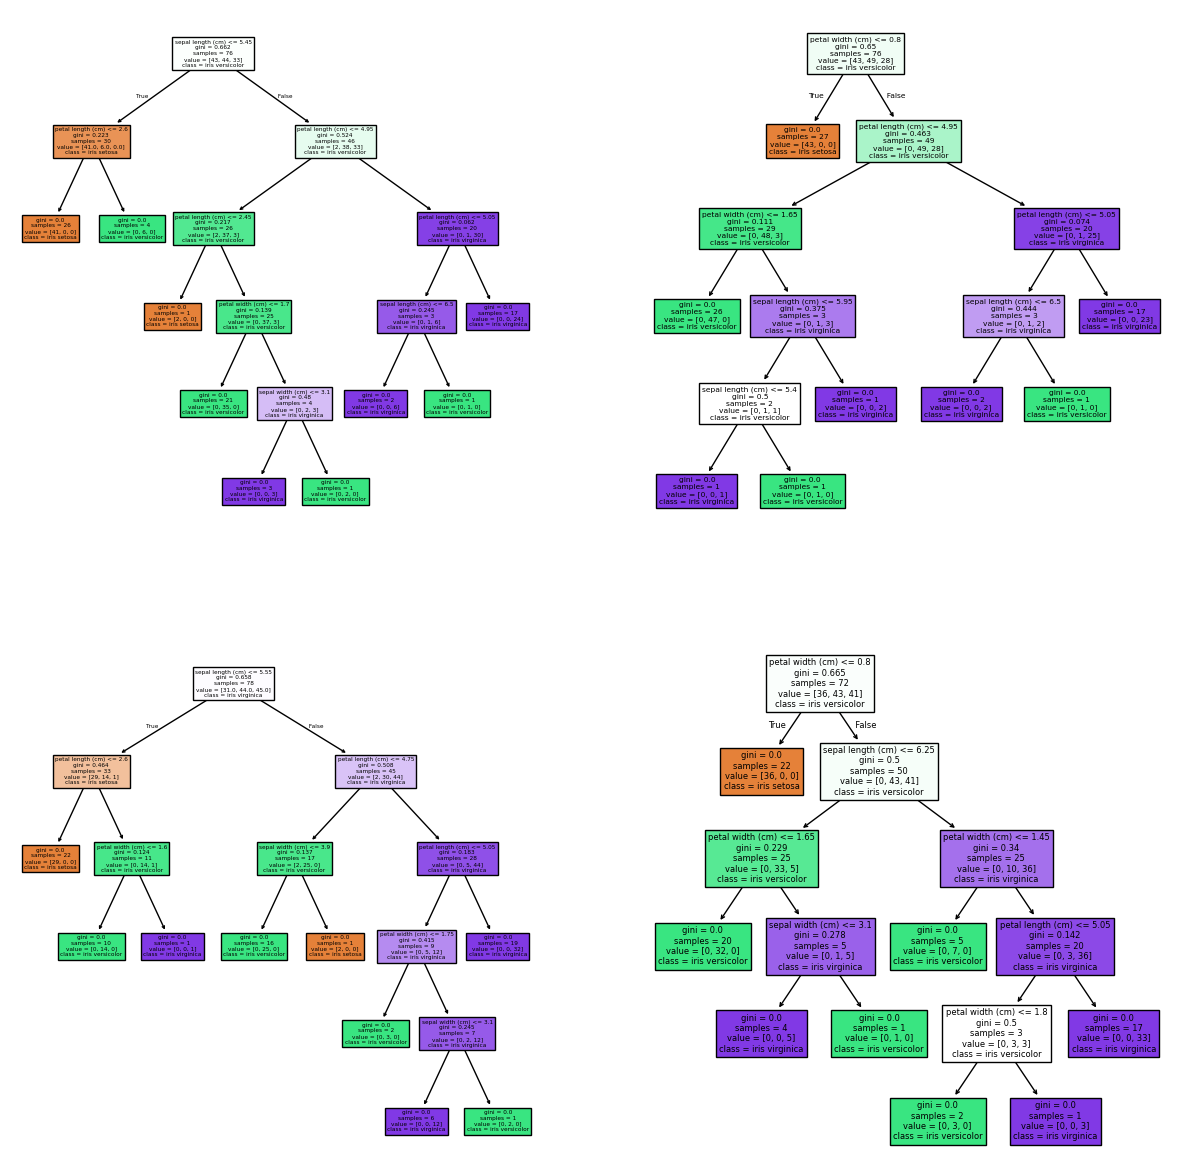

In [9]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# Mostramos los 4 primeros árboles de los 100 generados (por defecto)
clases = ["iris setosa", "iris versicolor", "iris virginica"]
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = clases, filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = clases, filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = clases, filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = clases, filled = True)

plt.show()

El tiempo de entrenamiento de un modelo dependerá, en primer lugar, del tamaño del conjunto de datos (instancias y características), y también de la cantidad de árboles que queramos que tenga nuestro random forest.

In [14]:
# predicción
y_pred_test = model.predict(X_test)
y_pred_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [15]:
y_pred_train = model.predict(X_train)
y_pred_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [16]:
# metricas
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)


Accuracy Test:  1.0
F1 score Test:  1.0
Precision Test:  1.0
Recall Test:  1.0
Accuracy Train:  0.9916666666666667
F1 score Train:  0.9916666666666667
Precision Train:  0.9916666666666667
Recall Train:  0.9916666666666667


Es importante considerar que este dataset es un problema de clasificación multiclase con tres clases (setosa, versicolor y virginica).

Al evaluar algunas metricas en un escenario multiclase, hay varias formas de promediar los resultados, siendo las más comunes "micro", "macro" y "weighted".

- Micro Average: Es útil cuando las clases tienen un tamaño similar y cuando quieres tener en cuenta todas las instancias por igual.
- Macro Average: Es adecuado cuando se quiere evaluar el rendimiento del modelo en cada clase de forma independiente y las clases son igualmente importantes.
- Weighted Average: Es ideal cuando las clases están desequilibradas y se quiere tener en cuenta el tamaño de cada clase en la evaluación global.

In [17]:
print(classification_report(y_test, y_pred_test, target_names=["iris setosa", "iris versicolor", "iris virginica"]))

                 precision    recall  f1-score   support

    iris setosa       1.00      1.00      1.00        10
iris versicolor       1.00      1.00      1.00         9
 iris virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



¡El modelo es perfecto!

## Paso 4. Guardado del modelo

Una vez tenemos el modelo que estábamos buscando (presumiblemente tras la optimización de hiperparámetros), para poder utilizarlo a futuro es necesario almacenarlo.

In [18]:
dump(model, open("random_forest_classifier_default_42.sav", "wb"))

#### Random forest para regresión

Para ejemplificar la implementación de un random forest para regresión utilizaremos el mismo conjunto de datos que para el caso de los árboles de decisión.

## Paso 1. Lectura del conjunto de datos procesado

In [19]:
# conexion drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
archivo = '/content/drive/MyDrive/4Geeks/cursadas/ds_pt_8/data/clean_petrol_consumption_train.csv'
train_data = pd.read_csv(archivo)

train_data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,8.0,4447,8577,0.529,464
1,7.5,4870,2351,0.529,414
2,8.0,5319,11868,0.451,344
3,7.0,4345,3905,0.672,968
4,7.5,3357,4121,0.547,628


In [21]:
archivo = '/content/drive/MyDrive/4Geeks/cursadas/ds_pt_8/data/clean_petrol_consumption_test.csv'
test_data = pd.read_csv(archivo)

test_data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,7.5,3846,9061,0.579,631
1,7.0,4449,4639,0.626,587
2,8.0,3448,5399,0.548,577
3,7.0,3745,2611,0.508,591
4,8.5,4574,2619,0.551,460


## Paso 2. Selección de variables

In [22]:
X_train = train_data.drop(["Petrol_Consumption"], axis = 1)
y_train = train_data["Petrol_Consumption"]

X_test = test_data.drop(["Petrol_Consumption"], axis = 1)
y_test = test_data["Petrol_Consumption"]

In [38]:
X_train.shape

(38, 4)

## Paso 3. Modelado

In [35]:
model = RandomForestRegressor(random_state = 42, n_estimators = 150)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

In [36]:
y_pred_test = model.predict(X_test)
y_pred_test

array([598.11333333, 589.66      , 577.57333333, 601.66      ,
       496.6       , 603.02666667, 514.64666667, 823.97333333,
       544.38      , 577.93333333])

In [37]:
# metricas
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

print("MSE Test: ", mse_test)
print("RMSE Test: ", rmse_test)

MSE Test:  6489.151453333335
RMSE Test:  80.55526955658044


## Paso 4. Guardado del modelo

In [ ]:
dump(model, open("random_forest_regressor_default_42.sav", "wb"))

## 5. Links de interés <a name="links"></a>

- [Understanding Random Forest](https://towardsdatascience.com/understanding-random-forest-58381e0602d2)
- [Random Forests con SkLearn](https://scikit-learn.org/stable/modules/ensemble.html#forest)
- [Random Forest Algorithm]( https://www.simplilearn.com/tutorials/machine-learning-tutorial/random-forest-algorithm)